In [1]:
import math

import ast

import itertools
from itertools import cycle
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from pubplot import Document
from pubplot.document_classes import acm_sigconf


inches_per_pt = 1.0 / 72.27
golden_ratio = (1.0 + math.sqrt(5.0)) / 2.0
doc = Document(acm_sigconf)
width = doc.columnwidth
height = width / golden_ratio
width = width * inches_per_pt
height = height * inches_per_pt * 0.8
figsize = [width, height]

width_third = doc.textwidth / 3
height_third = width_third / golden_ratio
width_third = width_third * inches_per_pt
height_third = height_third * inches_per_pt
figsize_third = [width_third, height_third]

width_full = doc.textwidth
height_full = width_full / golden_ratio / 3
width_full = width_full * inches_per_pt
height_full = height_full * inches_per_pt
figsize_full = [width_full, height_full]

tight_layout_pad = 0.21
linewidth = 2
elinewidth = 0.5
capsize = 1
capthick = 0.5

# This is "colorBlindness::PairedColor12Steps" from R.
# Check others here: https://r-charts.com/color-palettes/#discrete
palette = [
    '#19B2FF',
    '#2ca02c',  # "#32FF00",  # I hate this green, so I changed it... It may
                # not be as color-blind friendly as it was originally but since
                # we also use patterns, it should be fine.
    '#FF7F00',
    '#654CFF',
    '#E51932',
    '#FFBF7F',
    '#FFFF99',
    '#B2FF8C',
    '#A5EDFF',
    '#CCBFFF'
]

hatch_list = ['///', '---', '+++', '|||']

linestyle = [
    (0, (1, 0)),
    (0, (4, 1)),
    (0, (2, 0.5)),
    (0, (1, 0.5)),
    (0, (0.5, 0.5)),
    (0, (4, 0.5, 0.5, 0.5)),
    (0, (3, 1, 1, 1)),
    (0, (8, 1)),
    (0, (3, 1, 1, 1, 1, 1)),
    (0, (3, 1, 1, 1, 1, 1, 1, 1)),
]

prop_cycle = mpl.cycler(color=palette) + mpl.cycler(linestyle=linestyle)

style = {
    # Line styles.
    'axes.prop_cycle': prop_cycle,

    # Grid.
    'grid.linewidth': 0.2,
    'grid.alpha': 0.4,
    'axes.grid': False,
    'axes.axisbelow': True,

    'axes.linewidth': 0.2,

    # Ticks.
    'xtick.major.width': 0.2,
    'ytick.major.width': 0.2,
    'xtick.minor.width': 0.2,
    'ytick.minor.width': 0.2,

    # Font.
    # You can use any of the predefined LaTeX font sizes here as well as
    # "caption", to match the caption size.
    # 'font.family': 'serif',
    # 'font.family': 'Helvetica',
    'font.size': doc.LARGE,
    'axes.labelsize': doc.LARGE,
    'legend.fontsize': doc.large,
    'xtick.labelsize': doc.LARGE,
    'ytick.labelsize': doc.LARGE,

    'patch.linewidth': 0.2,

    'figure.dpi': 240,

    'text.usetex': False,
    'axes.formatter.use_mathtext': True ,
    'axes.formatter.limits': (-4,4),
}


# Apply style globally.
for k, v in style.items():
    mpl.rcParams[k] = v


In [2]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from autotune.utils.visualization.plot_convergence import plot_convergence


[27.4         1.20875795]


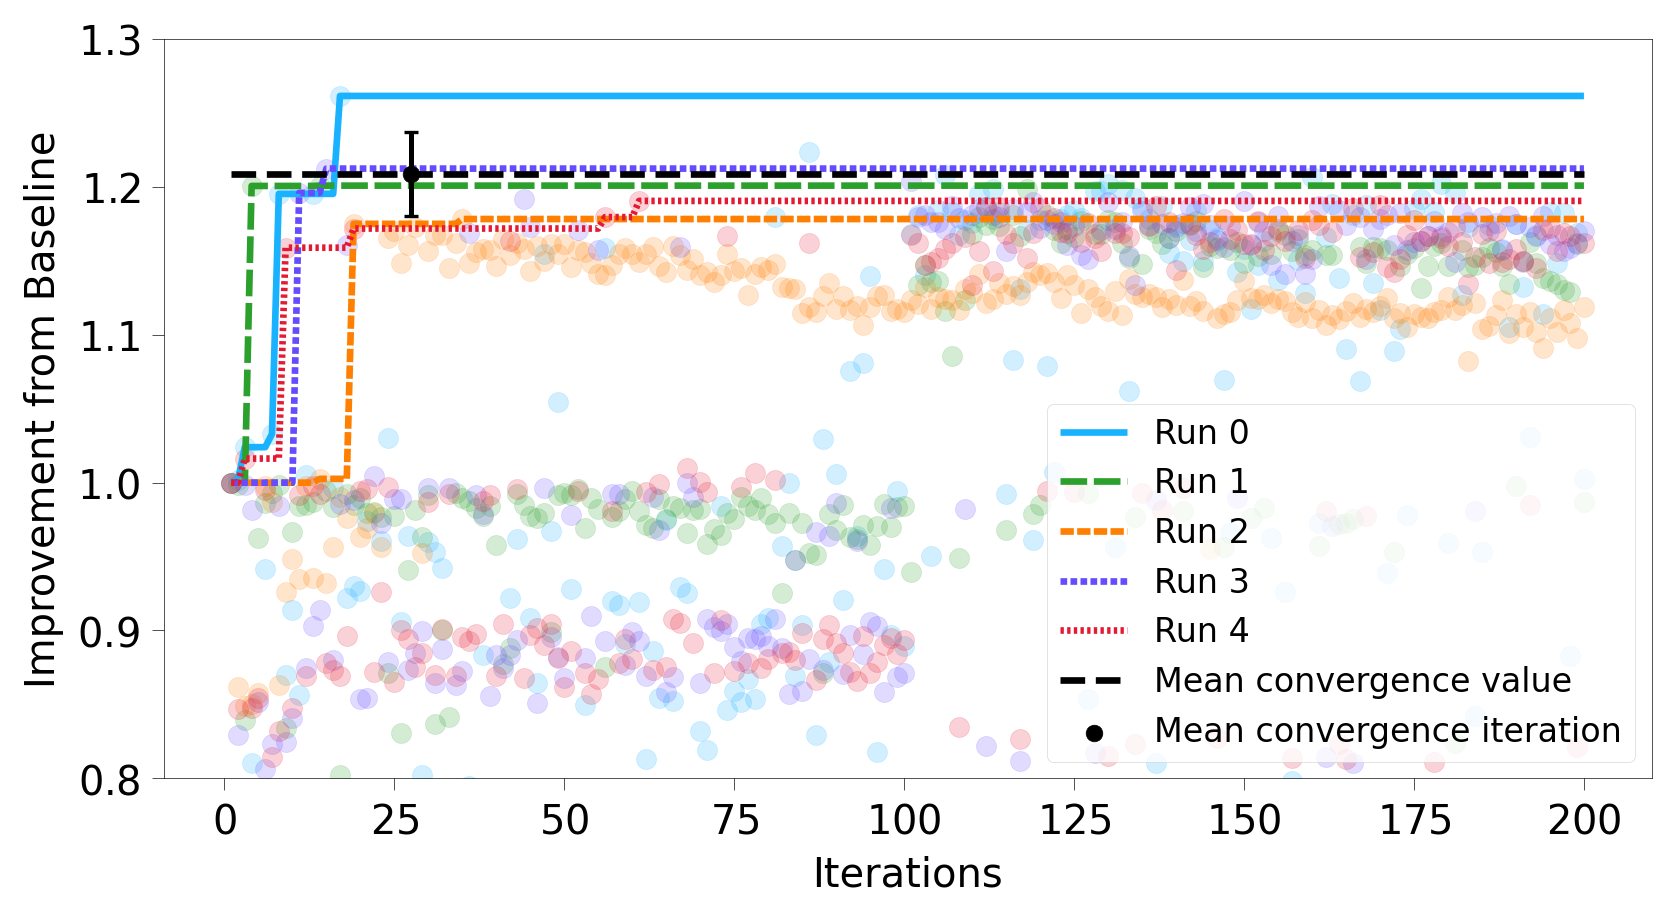

[27.4         1.20875795] [18.01776901  0.02871505]


In [3]:
hists = []
target = 'tpcc_minimal_nvme'
for i in range(5):
    target_file = f'DBTune_history/history_{target}_{i}.json'
    with open(target_file) as f:
        hist = json.load(f)
    hist = pd.concat([
        pd.DataFrame([c['configuration'] for c in hist['data']]),
        pd.DataFrame([c['external_metrics'] for c in hist['data']])
    ], axis = 1)
    hists.append(pd.DataFrame(hist.iloc[:]))

plt.cla()
ax = plt.gca()
convergences = []
for run, hist in enumerate(hists[:]):
    losses = hist['tps'].values
    iterations = np.arange(1, len(losses)+1)
    mins = np.array([np.nanmax(losses[:i]) for i in iterations])
    losses /= np.nanmin(mins)
    mins /= np.nanmin(mins)

    convergences.append([np.argmax(mins), mins[-1]])
    # max_mins = max(mins)
    # clipped_losses = np.clip(losses, None, max_mins)
    plot_convergence(iterations, mins, losses, xlabel = 'Iterations',
                     ylabel = 'Improvement from Baseline', ax=ax, name = f'Run {run}',
                     alpha=0.2,
                     linewidth=2)
mean_converge = np.mean(convergences, axis=0)
std_converge = np.std(convergences, axis=0)
ax.set_ylim(0.8,1.3)
ax.grid(False)

ax.hlines(y = mean_converge[1], xmin=1, xmax=len(hist.index), colors='black', linestyles = '--', linewidths = 2, label='Mean convergence value',zorder = 100)
ax.scatter(x = mean_converge[0], y = mean_converge[1], s=25, marker='o', color = 'black', label = 'Mean convergence iteration',zorder = 100)
ax.errorbar(x = mean_converge[0], y = mean_converge[1], yerr=std_converge[1], capsize = 2, color = 'black')
ax.legend()#loc='upper right')

fig = plt.gcf()
fig.set_size_inches(8, 4)
fig.set_dpi(240)

print(mean_converge)
plt.show()
# plt.savefig(f'convergence_anno.png', bbox_inches = 'tight', dpi=240)
print(mean_converge, std_converge)
plt.close()

In [142]:
data = pd.DataFrame([
    {'title': 'Default', 'tput':1833.26, 'err':  20.74},
    {'title': 'Reduced', 'tput':1870.35, 'err':  28.78},
    {'title': 'Range Restricted', 'tput':1867.46, 'err':  15.31},
])

In [143]:
min([min(hist['tps']) for hist in hists])

764.1673959956742

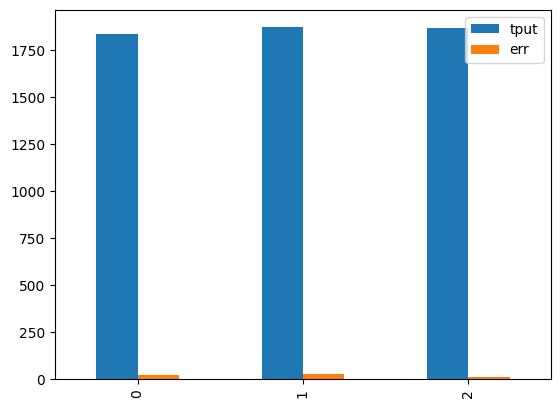

In [159]:
data.plot(kind='bar', stacked=False)
plt.show()

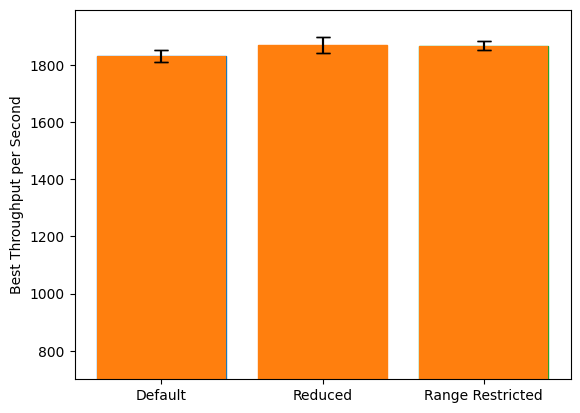

In [153]:
ax = plt.gca()
bars = ax.bar(x = data.index, height = data.tput, yerr=data.err, capsize=5)
for i, b in enumerate(bars):
    b.set_color(plt.rcParams['axes.prop_cycle'].by_key()['color'][i])

ax.set_xticks(np.arange(3))
ax.set_xticklabels(data.title)
ax.set_ylabel("Best Throughput per Second")
ax.set_ylim(700)
plt.show()